In [270]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
# from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random
from keras.layers import LeakyReLU

In [271]:
import seaborn as sns


In [360]:
os.environ['PYTHONHASHSEED']=str(42)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [361]:
df=pd.read_excel("data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3,NaN,NaN,NaN,NaN,NaN
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0,NaN,NaN,NaN,NaN,NaN
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5,NaN,NaN,NaN,NaN,NaN
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0,NaN,NaN,NaN,NaN,NaN
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0,NaN,NaN,NaN,NaN,NaN


In [362]:
data= df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]


In [363]:
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0


In [364]:
X= data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']]


In [365]:
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566


In [366]:
Y= data['X11']


In [367]:
Y.head()

0     4.3
1    10.0
2    17.5
3    31.0
4    34.0
Name: X11, dtype: float64

In [368]:
#We check the number of unique values in each column
a=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
for i in a:
    print(len(X[i].unique()))

18
17
17
8
18
17
9
14
55
52


In [369]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [370]:
# #this code reduces the  above outliers seen. This is done by chaning the values in the box plot based on inter quantile range 
# for i in X.columns:
#     q1=X[i].quantile(0.25)
#     q3=X[i].quantile(0.75)
#     iqr=q3-q1
#     ub=q3 + 1.5*iqr
#     lb=q1 - 1.5*iqr
#     uc=X[i].quantile(0.99)
#     lc=X[i].quantile(0.01)
#     for ind1 in X[i].index:
#         if X.loc[ind1, i] >ub:            
#             X.loc[ind1, i] =uc
#         if X.loc[ind1, i] < lb:
#             X.loc[ind1, i] =lc


In [371]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [372]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [373]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [256]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [258]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score


In [259]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

In [260]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)
from sklearn.model_selection import cross_val_score
RF_accuracies = cross_val_score(estimator = rf, X = X, y = Y, cv = kf,scoring="r2")
print("Mean_RF_Acc : ", RF_accuracies.mean())


Mean_RF_Acc :  0.8069808666979871


# So i just tried a neural network below, it is similar to the neural network given in the machine learning mastery, not really sure what it means but have to work on that

In [300]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import tensorflow as tf


In [303]:
from tensorflow.keras.optimizers import SGD

In [ ]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [ ]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [ ]:
# # DO NOT Modify this gives 74% accuracy
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()



In [374]:
opt = SGD(lr=0.01, momentum=0.9)
from sklearn.metrics import r2_score

Epoch 1/100
6/6 [==============================] - 0s 18ms/step - loss: 10.7496 - val_loss: 13.3279
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 10.4953 - val_loss: 12.9435
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 10.0333 - val_loss: 12.4168
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 9.4366 - val_loss: 11.6309
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 8.6508 - val_loss: 10.4462
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 7.8480 - val_loss: 9.1323
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 6.6740 - val_loss: 8.6303
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 6.3679 - val_loss: 8.0387
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 5.6562 - val_loss: 7.0553
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 4.8257 - val_loss: 6.4971
Epoch 11/100
6/6 [==

6/6 [==============================] - 0s 6ms/step - loss: 3.7388 - val_loss: 5.1560
Epoch 85/100
6/6 [==============================] - 0s 4ms/step - loss: 3.8778 - val_loss: 4.9856
Epoch 86/100
6/6 [==============================] - 0s 5ms/step - loss: 3.6923 - val_loss: 5.0772
Epoch 87/100
6/6 [==============================] - 0s 5ms/step - loss: 3.7401 - val_loss: 5.0855
Epoch 88/100
6/6 [==============================] - 0s 5ms/step - loss: 3.8286 - val_loss: 5.2180
Epoch 89/100
6/6 [==============================] - 0s 5ms/step - loss: 3.5157 - val_loss: 5.1503
Epoch 90/100
6/6 [==============================] - 0s 4ms/step - loss: 3.5441 - val_loss: 4.9627
Epoch 91/100
6/6 [==============================] - 0s 6ms/step - loss: 3.5856 - val_loss: 5.1922
Epoch 92/100
6/6 [==============================] - 0s 5ms/step - loss: 3.5103 - val_loss: 5.0834
Epoch 93/100
6/6 [==============================] - 0s 4ms/step - loss: 3.6240 - val_loss: 4.8194
Epoch 94/100
6/6 [===============

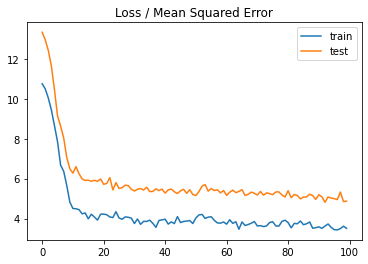

In [375]:
# # DO NOT Modify this gives 74% accuracy- LOL just kidding
# reg_model = Sequential()
# a=reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
# # reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
# reg_model.add(Dense(1, activation='linear'))
# reg_model.compile(loss='mae', 
#                 optimizer='SGD')


# history = reg_model.fit(X_train_std, Y_train, 
#                             validation_data=(X_test_std, Y_test), 
#                             epochs=100, verbose=1)

# train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
# test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# # plot loss during training
# plt.title('Loss / Mean Squared Error')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()
# # DO NOT Modify this gives 70%- actually
reg_model = Sequential()
a=reg_model.add(Dense(8, input_dim=10, activation=LeakyReLU(),kernel_initializer='normal'))
reg_model.add(Dense(4, activation=LeakyReLU()))
reg_model.add(Dropout(0.05))
reg_model.add(Dense(1, activation=LeakyReLU()))
reg_model.compile(loss='mae', 
                optimizer=opt)


history = reg_model.fit(X_train_std, Y_train, 
                            validation_data=(X_test_std, Y_test), 
                            epochs=100, verbose=1)
y_pred=reg_model.predict(X_test_std)
train_mse = reg_model.evaluate(X_train_std, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test_std, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()




In [378]:
r2_score(Y_test,y_pred)**0.5

0.7110123817460635

In [377]:
n= len(X_train_std)
p = len(X.columns)
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2**0.5

0.6894842435160897

In [265]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

# Principal Component Analysis

In [114]:
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [115]:
X_pca.shape

(219, 8)

In [120]:
PCA_df = pd.DataFrame(data = X_pca)
PCA_df.head()

,0,1,2,3,4,5,6,7
0,-0.644530,0.561085,-0.056426,-0.053508,0.150036,-0.029116,-0.121246,-0.029008
1,-0.644541,0.561058,-0.056457,-0.053537,0.150010,-0.029114,-0.121294,-0.028705
2,-0.644560,0.561013,-0.056509,-0.053584,0.149968,-0.029109,-0.121374,-0.028199
3,-0.644633,0.560831,-0.056718,-0.053774,0.149797,-0.029090,-0.121694,-0.026176
4,-0.644781,0.560468,-0.057136,-0.054154,0.149455,-0.029052,-0.122335,-0.022130


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(PCA_df, Y, test_size=0.20, random_state=101)

In [122]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [123]:
# DO NOT Modify
reg_model = Sequential()
reg_model.add(Dense(8, input_dim=8, activation='relu',kernel_initializer='he_uniform'))
reg_model.add(Dense(4, activation='relu'))
reg_model.add(Dropout(0.2))

reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='SGD', 
                metrics=['mae'])


his = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=100, verbose=0)

print(reg_model.evaluate(X_test, Y_test))
y_preds = reg_model.predict(X_test)

2/2 [==============================] - 0s 2ms/step - loss: 8.6978 - mae: 8.6978
[8.697833061218262, 8.697833061218262]


In [127]:
R2=r2_score(Y_test,y_preds)

In [129]:
n= len(X_train)
p = len(X[1])
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2

-0.11505813192651204

# AutoEncoder - standard scaler

In [215]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X = sc.fit_transform(X)


In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [216]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(10, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                shuffle=True,
                verbose = 30,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [217]:
X_ae

array([[0.5345026 , 0.6821753 , 1.0793736 , ..., 0.        , 3.9087536 ,
        1.5296675 ],
       [0.533669  , 0.68316996, 1.0797305 , ..., 0.        , 3.9093466 ,
        1.5279753 ],
       [0.53227955, 0.68482786, 1.0803254 , ..., 0.        , 3.9103346 ,
        1.5251552 ],
       ...,
       [0.        , 2.286841  , 0.        , ..., 2.6665328 , 0.        ,
        0.        ],
       [0.        , 2.300561  , 0.        , ..., 2.6602683 , 0.        ,
        0.        ],
       [0.        , 2.3280005 , 0.        , ..., 2.6477394 , 0.        ,
        0.        ]], dtype=float32)

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_ae, Y, test_size=0.20, random_state=101)

Epoch 1/200
6/6 [==============================] - 0s 18ms/step - loss: 11.2535 - val_loss: 13.7608
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 11.0335 - val_loss: 13.6155
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 10.9029 - val_loss: 13.5103
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 10.8037 - val_loss: 13.4372
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 10.7337 - val_loss: 13.3790
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 10.6746 - val_loss: 13.3299
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 10.6252 - val_loss: 13.2890
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 10.5818 - val_loss: 13.2520
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 10.5407 - val_loss: 13.2171
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 10.5018 - val_loss: 13.1898
Epoch 11

6/6 [==============================] - 0s 4ms/step - loss: 8.9416 - val_loss: 11.1466
Epoch 84/200
6/6 [==============================] - 0s 5ms/step - loss: 8.9069 - val_loss: 11.0855
Epoch 85/200
6/6 [==============================] - 0s 4ms/step - loss: 8.8702 - val_loss: 11.0321
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 8.8421 - val_loss: 10.9846
Epoch 87/200
6/6 [==============================] - 0s 4ms/step - loss: 8.8121 - val_loss: 10.9232
Epoch 88/200
6/6 [==============================] - 0s 4ms/step - loss: 8.7749 - val_loss: 10.8526
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 8.7419 - val_loss: 10.7851
Epoch 90/200
6/6 [==============================] - 0s 4ms/step - loss: 8.7075 - val_loss: 10.7076
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 8.6653 - val_loss: 10.6304
Epoch 92/200
6/6 [==============================] - 0s 4ms/step - loss: 8.6272 - val_loss: 10.5652
Epoch 93/200
6/6 [=====

Epoch 166/200
6/6 [==============================] - 0s 5ms/step - loss: 5.6482 - val_loss: 7.1199
Epoch 167/200
6/6 [==============================] - 0s 5ms/step - loss: 5.5053 - val_loss: 7.1389
Epoch 168/200
6/6 [==============================] - 0s 4ms/step - loss: 5.4692 - val_loss: 7.2414
Epoch 169/200
6/6 [==============================] - 0s 4ms/step - loss: 5.5156 - val_loss: 7.1063
Epoch 170/200
6/6 [==============================] - 0s 4ms/step - loss: 5.5041 - val_loss: 7.2479
Epoch 171/200
6/6 [==============================] - 0s 4ms/step - loss: 5.5628 - val_loss: 7.3848
Epoch 172/200
6/6 [==============================] - 0s 4ms/step - loss: 5.5648 - val_loss: 7.1193
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 5.3936 - val_loss: 7.1705
Epoch 174/200
6/6 [==============================] - 0s 6ms/step - loss: 5.4075 - val_loss: 6.9576
Epoch 175/200
6/6 [==============================] - 0s 6ms/step - loss: 5.3236 - val_loss: 7.0424
Epoch 176/

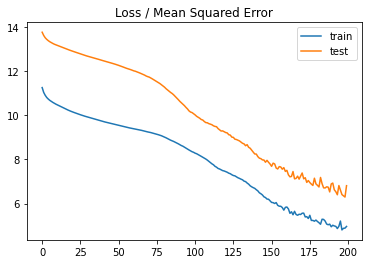

In [222]:
# DO NOT Modify
reg_model = Sequential()
reg_model.add(Dense(8, input_dim=10, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(4, activation='relu',kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='SGD')


history = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=200, verbose=1)

train_mse = reg_model.evaluate(X_train, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
y_preds=reg_model.predict(X_test)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [225]:
r2_score(Y_test,y_preds)**0.5

0.5643651644183402

In [224]:
n= len(X_train)
p = len(X[1])
adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
adj_R2**0.5

0.5262638605599254

# Stacked AutoEncoder

In [226]:
from keras import regularizers
batch_size = 32
input_dim = X_train[0].shape[0] #num of predictor variables 
learning_rate = 1e-4
input_layer = Input(shape=(input_dim, ), name="input")
#Input Layer
encoder = Dense (100, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
#Encoder’s first dense layer
encoder = Dense (50, activation="relu",
activity_regularizer=regularizers.l1(learning_rate))(encoder)
#Encoder’s second dense layer
encoder = Dense (25, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Code layer
encoder = Dense (8, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s first dense layer
decoder = Dense(25, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(encoder)
# Decoder’s second dense layer
decoder = Dense(50, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Decoder’s Third dense layer
decoder = Dense(100, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(decoder)
# Output Layer
decoder = Dense(input_dim, activation="sigmoid", activity_regularizer=regularizers.l1(learning_rate))(decoder)

In [227]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_1 = autoencoder_1.fit(X_train, X_train,epochs=200,batch_size=batch_size)


Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 1.2595 - accuracy: 0.1257
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 1.2302 - accuracy: 0.2286
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 1.1804 - accuracy: 0.2286
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 1.1124 - accuracy: 0.2286
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0687 - accuracy: 0.2286
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.2286
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9987 - accuracy: 0.2457
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9568 - accuracy: 0.2686
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9226 - accuracy: 0.2971
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8977 - accuracy: 0.3657
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.5314
Epoch 85/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7158 - accuracy: 0.5429
Epoch 86/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7152 - accuracy: 0.5314
Epoch 87/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.5371
Epoch 88/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7141 - accuracy: 0.5143
Epoch 89/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.5257
Epoch 90/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.5257
Epoch 91/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.5143
Epoch 92/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.4971
Epoch 93/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.4971
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.5429
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.5600
Epoch 169/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5486
Epoch 170/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7038 - accuracy: 0.5429
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5657
Epoch 172/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5886
Epoch 173/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5486
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.5543
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5429
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.5543
Epoch 177/200
6/6 [=====

In [229]:
autoencoder_2_input = autoencoder_1.predict(X_train)
autoencoder_2_input = np.concatenate((autoencoder_2_input , X_train))


In [230]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')
satck_2 = autoencoder_2.fit(autoencoder_2_input, autoencoder_2_input,epochs=100,batch_size=batch_size)


Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.6371
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.7514
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.6686
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.7000
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.7200
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.7314
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.7057
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.7429
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.7486
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.7371
Epoch 11/

11/11 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.7514
Epoch 84/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.7600
Epoch 85/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.7486
Epoch 86/100
11/11 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.7629
Epoch 87/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7429
Epoch 88/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.7600
Epoch 89/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7657
Epoch 90/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.7571
Epoch 91/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7629
Epoch 92/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.7486
Epoch 93/100


In [231]:
autoencoder_3_input = autoencoder_2.predict(autoencoder_2_input)
autoencoder_3_input = np.concatenate((autoencoder_3_input, autoencoder_2_input))


In [232]:
autoencoder_3 = Model(inputs=input_layer, outputs=decoder)
autoencoder_3.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
satck_3 = autoencoder_3.fit(autoencoder_3_input, autoencoder_3_input, epochs=50, batch_size=16)

Epoch 1/50
44/44 [==============================] - 1s 1ms/step - loss: 0.1772 - accuracy: 0.8429
Epoch 2/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1771 - accuracy: 0.8486
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.8429
Epoch 4/50
44/44 [==============================] - ETA: 0s - loss: 0.1907 - accuracy: 0.83 - 0s 1ms/step - loss: 0.1769 - accuracy: 0.8400
Epoch 5/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.8514
Epoch 6/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1770 - accuracy: 0.8386
Epoch 7/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 0.8400
Epoch 8/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.8357
Epoch 9/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.8286
Epoch 10/50
44/44 [==============================] - 0s 1ms/step - loss: 0.1

In [233]:
encoded = Model(input_layer, encoder)
X_ae1 = encoded.predict(X)
X_ae1.shape

(219, 8)

In [234]:
AEC_df = pd.DataFrame(data = X_ae1)
AEC_df.head()

,0,1,2,3,4,5,6,7
0,0.0,1.318800,1.074501,0.925603,0.060879,0.445664,1.522639,0.0
1,0.0,1.319359,1.074960,0.925644,0.060706,0.445611,1.522937,0.0
2,0.0,1.320340,1.075920,0.925472,0.060442,0.445836,1.523598,0.0
3,0.0,1.324142,1.079639,0.924848,0.059435,0.446809,1.526168,0.0
4,0.0,1.328306,1.083765,0.925408,0.058882,0.450805,1.529232,0.0


In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(AEC_df, Y, test_size=0.20, random_state=101)

Epoch 1/200
6/6 [==============================] - 0s 18ms/step - loss: 10.6264 - val_loss: 13.2338
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 10.5360 - val_loss: 13.1645
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 10.4580 - val_loss: 13.0987
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 10.3793 - val_loss: 13.0307
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 10.2989 - val_loss: 12.9637
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 10.2186 - val_loss: 12.8912
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 10.1326 - val_loss: 12.8123
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 10.0392 - val_loss: 12.7254
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 9.9429 - val_loss: 12.6371
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 9.8498 - val_loss: 12.5520
Epoch 11/2

6/6 [==============================] - 0s 4ms/step - loss: 7.8072 - val_loss: 9.4974
Epoch 85/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7874 - val_loss: 9.5181
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7803 - val_loss: 9.5443
Epoch 87/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7613 - val_loss: 9.5030
Epoch 88/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7430 - val_loss: 9.4796
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 7.7341 - val_loss: 9.4576
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7170 - val_loss: 9.4270
Epoch 91/200
6/6 [==============================] - 0s 5ms/step - loss: 7.7047 - val_loss: 9.4016
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 7.6864 - val_loss: 9.3624
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 7.6852 - val_loss: 9.3497
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 4ms/step - loss: 6.6022 - val_loss: 8.7593
Epoch 168/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5995 - val_loss: 8.7607
Epoch 169/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5958 - val_loss: 8.7645
Epoch 170/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5825 - val_loss: 8.7629
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 6.5866 - val_loss: 8.7656
Epoch 172/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5981 - val_loss: 8.7535
Epoch 173/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5891 - val_loss: 8.7364
Epoch 174/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5753 - val_loss: 8.7253
Epoch 175/200
6/6 [==============================] - 0s 4ms/step - loss: 6.5519 - val_loss: 8.7179
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 6.5596 - val_loss: 8.7204
Epoch 177/200
6/6 [=====

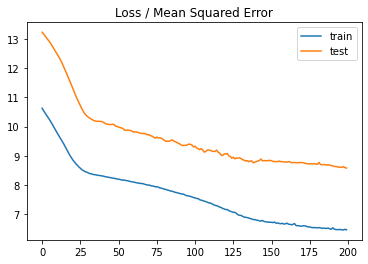

In [238]:
# DO NOT Modify
reg_model = Sequential()
reg_model.add(Dense(8, input_dim=8, activation='relu'))
reg_model.add(Dense(4, activation='relu'))
reg_model.add(Dense(1, activation='linear'))
reg_model.compile(loss='mae', 
                optimizer='SGD')


history = reg_model.fit(X_train, Y_train, 
                            validation_data=(X_test, Y_test), 
                            epochs=200, verbose=1)

train_mse = reg_model.evaluate(X_train, Y_train, verbose=0)
test_mse = reg_model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
y_preds=reg_model.predict(X_test)
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [239]:
r2_score(Y_test,y_preds)**0.5

nan

# Independent component analysis

In [29]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)
X_ica = pd.DataFrame(data = X_ica)


In [30]:
X_ica.head()

,0,1,2,3,4,5,6,7
0,-0.016637,-0.032390,-0.120925,-0.073528,0.032233,0.031620,0.035413,0.015851
1,-0.016648,-0.032399,-0.120950,-0.073510,0.032222,0.031528,0.035400,0.015844
2,-0.016666,-0.032414,-0.120992,-0.073480,0.032203,0.031374,0.035378,0.015832
3,-0.016739,-0.032473,-0.121160,-0.073360,0.032129,0.030761,0.035292,0.015786
4,-0.016885,-0.032591,-0.121495,-0.073121,0.031981,0.029534,0.035118,0.015693
